<h1>Gradient Descent</h1>

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

<i>Source: </i> https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

The followig picture illustrates that choosing an appropriate learning rate is important:
<img src = "https://i.stack.imgur.com/VxQgz.png">
<i>Source:</i>https://datascience.stackexchange.com/questions/50948/gradient-descent


<h2>Gradient algorithm with fixed step</h2>

The gradient with symbol r, nabla, is the vector of 1st-order partial derivatives of a
single multi-variable equation:

$u_{k+1} = u_k − ρ\nabla J(u_k)$

Here, we have the following:

$\nabla J$ is the gradient of the cost function, that is the vector of 1st-order partial derivatives of multi-variable equation. Can be also defined as: $\frac{2}{m} X^T(X\beta -y)$

$ρ$ is the parameter used to increment the steps

$u$ is the vector being analysed

<i>Source: </i> Optimization - Didier Auroux

Let's use a linear regression problem to analyse gradient descent:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.random.randn(100, 1)
noise=np.reshape(noise,(100,1))
y = 4 + 3 * X + noise

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

In [30]:
n_iterations = 1000
m = 100

def gradient_descent(rate = 0.1):
    theta = np.random.randn(2,1) # random initialization of the first vector being analysed
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - rate * gradients
    return theta
gradient_descent(0.1)

array([[4.16013644],
       [2.96719722]])

To salve my conscience I've compared the result using the normal equation and hopefully I obtained the same result.

In [31]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[4.16013644],
       [2.96719722]])

For step 0.02 we go slow that after 1000 interations we haven't reached the minimum, on the other hand 0.5 is too big to reach the minimum.

In [32]:
print(gradient_descent(0.02))
print(gradient_descent(0.5))

[[4.15998826]
 [2.96732435]]
[[-3.09314435e+53]
 [-3.60522466e+53]]


The lines in the following chart shows how the algorithm work towards the minimum:

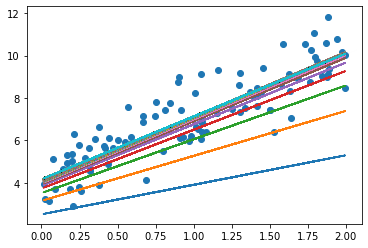

In [33]:
plt.scatter(X,y)
rate = 0.1

theta = np.random.randn(2,1) # random initialization of the first vector being analysed
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - rate * gradients
    y_pred= theta[0]+theta[1]*X
    plt.plot(X,y_pred)

plt.show()

<h2>Stochastic Gradient Descent</h2>
Stochastic Gradient Descent (SGD) just picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)
Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.
When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure that the parameters get pulled towards the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example if the instances are sorted by label, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

[[4.24959334]
 [2.77571958]]


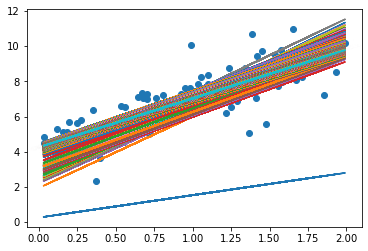

In [10]:
plt.scatter(X,y)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_pred= theta[0]+theta[1]*X
        plt.plot(X,y_pred)

print(theta)
plt.show()

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13062675]), array([2.94746783]))

<h2>Mini-batch Gradient Descent</h2>
The last Gradient Descent algorithm we will look at is called Mini-batch Gradient Descent. It is quite simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches.
The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.
The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression as we saw earlier). Figure 4-11 shows the paths taken by the three Gradient Descent algorithms in parameter space during
training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.
Figure

[[4.10207389]
 [2.99516169]]


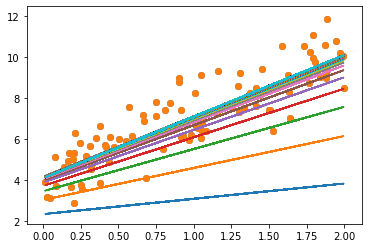

In [36]:
plt.scatter(X,y)
from sklearn.model_selection import train_test_split

plt.scatter(X,y)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi, x_test = train_test_split(X_b,test_size=0.1, random_state=42)
        yi, y_test = train_test_split(y,test_size=0.1, random_state=42)
        gradients = 2/m * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_pred= theta[0]+theta[1]*X
        plt.plot(X,y_pred)

print(theta)
plt.show()

<h2>Comparison of algorithms for Linear Regression</h2>

In [34]:
import pandas as pd
df=pd.DataFrame({'Algorithm': ['Large m', ' Out-of-core', ' support Large n ', 'Hyperparams', ' Scaling required ', 'Scikit-Learn'],
'Normal Equation': [' Fast', ' No', ' Slow', ' 0', ' No', ' n/a'],
'SVD': ['Fast ', 'No ', 'Slow', ' 0', ' No', ' LinearRegression'],
'Batch GD': ['Slow', ' No', ' Fast', ' 2 ', 'Yes', ' SGDRegressor'],
'Stochastic GD': ['Fast', ' Yes ', 'Fast', ' ≥2', ' Yes ', 'SGDRegressor'],
'Mini-batch GD': ['Fast', ' Yes', ' Fast', ' ≥2', ' Yes', ' SGDRegressor']})
df.style.hide_index()

Algorithm,Normal Equation,SVD,Batch GD,Stochastic GD,Mini-batch GD
Large m,Fast,Fast,Slow,Fast,Fast
Out-of-core,No,No,No,Yes,Yes
support Large n,Slow,Slow,Fast,Fast,Fast
Hyperparams,0,0,2,≥2,≥2
Scaling required,No,No,Yes,Yes,Yes
Scikit-Learn,n/a,LinearRegression,SGDRegressor,SGDRegressor,SGDRegressor
